In [1]:
import pandas as pd
import numpy as np

from data.data_dictionary import var_map, chron_conditions

chroncon_file = 'data/Assignment4_ChronicConditions-2.csv'
df = pd.DataFrame.from_csv(chroncon_file, encoding='latin1').reset_index()

display(df.head())
print(df.shape)

,BENE_SEX_IDENT_CD,BENE_AGE_CAT_CD,CC_ALZHDMTA,CC_CANCER,CC_CHF,CC_CHRNKIDN,CC_COPD,CC_DEPRESSN,CC_DIABETES,CC_ISCHMCHT,...,BENE_COUNT_PC_LT_12,AVE_MO_EN_PC_LT_12,BENE_COUNT_PC_EQ_12,BENE_COUNT_PD_LT_12,AVE_MO_EN_PD_LT_12,AVE_PDE_CST_PD_LT_12,AVE_PDE_PD_LT_12,BENE_COUNT_PD_EQ_12,AVE_PDE_CST_PD_EQ_12,AVE_PDE_PD_EQ_12
0,1,1,NaN,NaN,0,0,NaN,NaN,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65.0,7230.0,49.877
1,1,1,NaN,NaN,0,0,NaN,NaN,0,0,...,NaN,NaN,NaN,42.0,5.952,2165.0,24.81,203.0,7163.0,73.404
2,1,1,NaN,NaN,0,0,NaN,NaN,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,104.0,4007.0,51.481
3,1,1,NaN,NaN,0,0,NaN,NaN,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,209.0,9021.0,75.732
4,1,1,NaN,NaN,0,0,NaN,NaN,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,66.0,5925.0,61.591


(22003, 55)


In [2]:
# Columns for total spent for each profile

df['A_tot_pay']      = df['BENE_COUNT_PA_EQ_12'] * df['AVE_PA_PAY_PA_EQ_12']
df['A_tot_IP']       = df['BENE_COUNT_PA_EQ_12'] * df['AVE_IP_PAY_PA_EQ_12']
df['A_tot_IP_adm']   = df['BENE_COUNT_PA_EQ_12'] * df['AVE_IP_ADM_PA_EQ_12']
df['A_tot_SNF']      = df['BENE_COUNT_PA_EQ_12'] * df['AVE_SNF_PAY_PA_EQ_12']
df['A_tot_SNF_days'] = df['BENE_COUNT_PA_EQ_12'] * df['AVE_SNF_DAYS_PA_EQ_12']
df['A_tot_other']    = df['BENE_COUNT_PA_EQ_12'] * df['AVE_OTH_PAY_PA_EQ_12']

df['B_tot_pay']    = df['BENE_COUNT_PB_EQ_12'] * df['AVE_PB_PAY_PB_EQ_12']
df['B_tot_CA']     = df['BENE_COUNT_PB_EQ_12'] * df['AVE_CA_PAY_PB_EQ_12']
df['B_tot_CA_vis'] = df['BENE_COUNT_PB_EQ_12'] * df['AVE_CA_VST_PB_EQ_12']
df['B_tot_OP']     = df['BENE_COUNT_PB_EQ_12'] * df['AVE_OP_PAY_PB_EQ_12']
df['B_tot_OP_vis'] = df['BENE_COUNT_PB_EQ_12'] * df['AVE_OP_VST_PB_EQ_12']
df['B_tot_other']  = df['BENE_COUNT_PB_EQ_12'] * df['AVE_OTH_PAY_PB_EQ_12']

df['D_tot_cost'] = df['BENE_COUNT_PD_EQ_12'] * df['AVE_PDE_CST_PD_EQ_12']
df['D_tot_rx']   = df['BENE_COUNT_PD_EQ_12'] * df['AVE_PDE_PD_EQ_12']

In [3]:
num_benes_part_A = []
num_benes_part_B = []
num_benes_part_C = []
num_benes_part_D = []

tot_paid_part_A = []
tot_paid_part_B = []
tot_paid_part_D = []

avg_paid_part_A = []
avg_paid_part_B = []
avg_paid_part_D = []



def get_numbers(chroncon):

    numbers = {
        'part_A' : {
            'num_benes'    : 0,
            'tot_pay'      : 0.,
            'avg_pay'      : 0.,
            'avg_IP'       : 0.,
            'avg_IP_adm'   : 0.,
            'avg_SNF'      : 0.,
            'avg_SNF_days' : 0.,
            'avg_other'    : 0.,
        },
        'part_B' : {
            'num_benes'   : 0,
            'tot_pay'     : 0.,
            'avg_pay'     : 0.,
            'avg_CA'      : 0.,
            'avg_CA_vis'  : 0.,
            'avg_OP'      : 0.,
            'avg_OP_vis'  : 0.,
            'avg_other'   : 0.,
        },
        'part_C' : {
            'num_benes' : 0,
        },
        'part_D' : {
            'num_benes'   : 0,
            'tot_cost'    : 0.,
            'avg_num_rx'  : 0.,
            'avg_rx_cost' : 0.,
        },
    }
    
    # drop rows where condition is not present - also drops suppressed
    df_ = df[df[chroncon] == 1.]
    
    
    
    # Part A
    #############################
    # Num benes with this disease
    numbers['part_A']['num_benes'] = df_['BENE_COUNT_PA_EQ_12'].sum()
    num_benes_part_A.append(numbers['part_A']['num_benes'])
    
    # Total spent for people with this disease
    numbers['part_A']['tot_pay'] = df_['A_tot_pay'].sum()
    tot_paid_part_A.append(numbers['part_A']['tot_pay'])

    # Average spent per person with this disease
    numbers['part_A']['avg_pay'] = df_['A_tot_pay'].sum() \
                                   / numbers['part_A']['num_benes']
    avg_paid_part_A.append(numbers['part_A']['avg_pay'])
        
    # Average for InPatient services per person with this disease
    numbers['part_A']['avg_IP']  = df_['A_tot_IP'].sum() \
                                   / numbers['part_A']['num_benes']
        
    # Average InPatient admissions per person with this disease
    numbers['part_A']['avg_IP_adm'] = df_['A_tot_IP_adm'].sum() \
                                   / numbers['part_A']['num_benes']
        
    # Average for Skilled Nursing Facility services per person with this disease
    numbers['part_A']['avg_SNF'] = df_['A_tot_SNF'].sum() \
                                   / numbers['part_A']['num_benes']
        
    # Average Skilled Nursing Facility covered days per person with this disease
    numbers['part_A']['avg_SNF_days'] = df_['A_tot_SNF_days'].sum() \
                                   / numbers['part_A']['num_benes']
        
    # Average other spending per person with this disease
    numbers['part_A']['avg_other'] = df_['A_tot_other'].sum() \
                                   / numbers['part_A']['num_benes']


    
    # Part B
    #############################
    # Num benes with this disease
    numbers['part_B']['num_benes'] = df_['BENE_COUNT_PB_EQ_12'].sum()
    num_benes_part_B.append(numbers['part_B']['num_benes'])
    
    # Total spent for people with this disease
    numbers['part_B']['tot_pay'] = df_['B_tot_pay'].sum()
    tot_paid_part_B.append(numbers['part_B']['tot_pay'])
    
    # Average spent per person with this disease
    numbers['part_B']['avg_pay'] = df_['B_tot_pay'].sum() \
                                      / numbers['part_B']['num_benes']
    avg_paid_part_B.append(numbers['part_B']['avg_pay'])
        
    # Average for Carrier/Physician visits per person with this disease
    numbers['part_B']['avg_CA'] = df_['B_tot_CA'].sum() \
                                      / numbers['part_B']['num_benes']
        
    # Average Carrier/Physician visits per person with this disease
    numbers['part_B']['avg_CA_vis'] = df_['B_tot_CA_vis'].sum() \
                                      / numbers['part_B']['num_benes']
        
    # Average for OutPatient services per person with this disease
    numbers['part_B']['avg_OP'] = df_['B_tot_OP'].sum() \
                                      / numbers['part_B']['num_benes']
        
    # Average OutPatient visits per person with this disease
    numbers['part_B']['avg_OP_vis'] = df_['B_tot_OP_vis'].sum() \
                                      / numbers['part_B']['num_benes']
        
    # Average other spending per person with this disease
    numbers['part_B']['avg_other'] = df_['B_tot_other'].sum() \
                                      / numbers['part_B']['num_benes']

    
    

    # Part C
    #############################
    # Num benes with this disease
    numbers['part_C']['num_benes'] = df_['BENE_COUNT_PC_EQ_12'].sum()
    num_benes_part_C.append(numbers['part_C']['num_benes'])


    # Part D
    #############################
    # Num benes with this disease
    numbers['part_D']['num_benes']   = df_['BENE_COUNT_PD_EQ_12'].sum()
    num_benes_part_D.append(numbers['part_D']['num_benes'])
    
    # Total spent for people with this disease
    numbers['part_D']['tot_cost'] = df_['D_tot_cost'].sum()
    tot_paid_part_D.append(numbers['part_D']['tot_cost'])

    
    # Average number of RX per person with this disease
    numbers['part_D']['avg_num_rx']  = df_['D_tot_rx'].sum() \
                                      / numbers['part_D']['num_benes']
    # Average RX cost per person with this disease
    numbers['part_D']['avg_rx_cost'] = df_['D_tot_cost'].sum() \
                                      / numbers['part_D']['num_benes']
    avg_paid_part_D.append(numbers['part_D']['avg_rx_cost'])
        
        




    del df_
    return numbers

In [4]:
for x in chron_conditions:
    n = get_numbers(x)
    print('\n\n\n')

    print(var_map[x] + ':')
    
    
    
    print('   ', 'Part A=12:')
    
    print('       ', 'Num benes with this condition:',
           str(int(n['part_A']['num_benes'])))
    print('       ', 'Total spent for people with this condition:',
           str(n['part_A']['tot_pay']))
    print('       ', 'Average spent per person with this condition:',
           str((n['part_A']['avg_pay'])))
    print('       ', 'Average for InPatient services per person with this condition:',
           str((n['part_A']['avg_IP'])))
    print('       ', 'Average InPatient admissions per person with this condition:',
           str((n['part_A']['avg_IP_adm'])))
    print('       ', 'Average for Skilled Nursing Facility services per person with this condition:',
           str((n['part_A']['avg_SNF'])))
    print('       ', 'Average Skilled Nursing Facility covered days per person with this condition:',
           str((n['part_A']['avg_SNF_days'])))
    print('       ', 'Average other spending per person with this condition:',
           str((n['part_A']['avg_other'])))

    

    print('\n   ', 'Part B=12:')
    print('       ', 'Num benes with this condition:',
           str(int(n['part_B']['num_benes'])))
    print('       ', 'Total spent for people with this condition:',
           str(n['part_B']['tot_pay']))
    print('       ', 'Average spent per person with this condition:',
           str(n['part_B']['avg_pay']))
    print('       ', 'Average for Carrier/Physician visits per person with this condition:',
           str(n['part_B']['avg_CA']))
    print('       ', 'Average Carrier/Physician visits per person with this condition:',
           str(n['part_B']['avg_CA_vis']))
    print('       ', 'Average for OutPatient services per person with this condition:',
           str(n['part_B']['avg_OP']))
    print('       ', 'Average OutPatient visits per person with this condition:',
           str(n['part_B']['avg_OP_vis']))
    print('       ', 'Average other spending per person with this condition:',
           str(n['part_B']['avg_other']))
    
    
    
    print('\n   ', 'Part C=12:')
    print('       ', 'Num benes with this condition:',
           str(int(n['part_C']['num_benes'])))
    
    
    
    print('\n   ', 'Part D=12:')
    print('       ', 'Num benes with this condition:',
           str(int(n['part_D']['num_benes'])))
    
    print('       ', 'Total spent on RX for people with this condition:',
           str(n['part_D']['tot_cost']))
    
    print('       ', 'Average number of RX per person with this condition:',
           str(n['part_D']['avg_num_rx']))
    
    print('       ', 'Average RX cost per person with this condition:',
           str(n['part_D']['avg_rx_cost']))





Alzheimer's Disease:
    Part A=12:
        Num benes with this condition: 2857524
        Total spent for people with this condition: 35210245494.0
        Average spent per person with this condition: 12321.942175813747
        Average for InPatient services per person with this condition: 6775.924616556152
        Average InPatient admissions per person with this condition: 0.7269726175528193
        Average for Skilled Nursing Facility services per person with this condition: 3324.2578232063843
        Average Skilled Nursing Facility covered days per person with this condition: 8.734639491741788
        Average other spending per person with this condition: 1752.7188730523349

    Part B=12:
        Num benes with this condition: 2878620
        Total spent for people with this condition: 20794373409.0
        Average spent per person with this condition: 7223.729915376118
        Average for Carrier/Physician visits per person with this condition: 3555.4357747809713
        A


    Part B=12:
        Num benes with this condition: 6445204
        Total spent for people with this condition: 45206458460.0
        Average spent per person with this condition: 7013.968597425311
        Average for Carrier/Physician visits per person with this condition: 3884.0562742467114
        Average Carrier/Physician visits per person with this condition: 11.335492557411678
        Average for OutPatient services per person with this condition: 1825.2049663594821
        Average OutPatient visits per person with this condition: 5.9055009618004295
        Average other spending per person with this condition: 1304.0193584252725

    Part C=12:
        Num benes with this condition: 153380

    Part D=12:
        Num benes with this condition: 3901766
        Total spent on RX for people with this condition: 15198962486.0
        Average number of RX per person with this condition: 56.70240305825616
        Average RX cost per person with this condition: 3895.405948485891





### Plots

In [5]:
import matplotlib.pyplot as plt

import matplotlib
matplotlib.style.use('seaborn-muted')
%matplotlib inline

con_labels = [ var_map[c] for c in chron_conditions ]
idx = np.arange(len(con_labels))

#### Total amount spent by condition and program

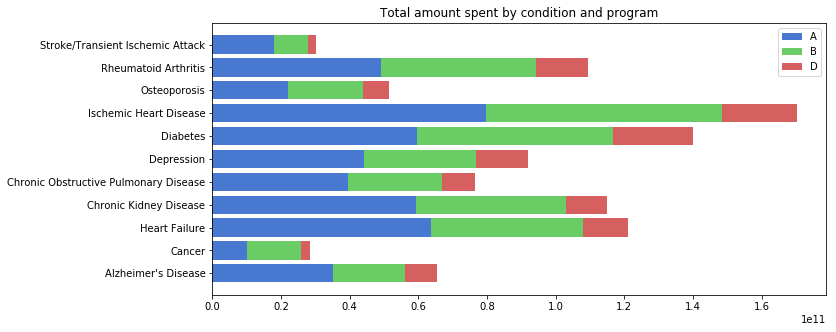

In [7]:
_ = plt.figure(figsize=(11,5))

left_A = None
left_B = tot_paid_part_A
left_D = [sum(x) for x in zip(tot_paid_part_A, tot_paid_part_B)]


p1 = plt.barh(idx, tot_paid_part_A)
p2 = plt.barh(idx, tot_paid_part_B, left=left_B)
p4 = plt.barh(idx, tot_paid_part_D, left=left_D)

plt.title('Total amount spent by condition and program')
plt.yticks(idx, con_labels)
plt.legend((p1[0], p2[0], p4[0]), ('A', 'B', 'D'))
plt.show();

#### Average amount spent per beneficiary by condition and program

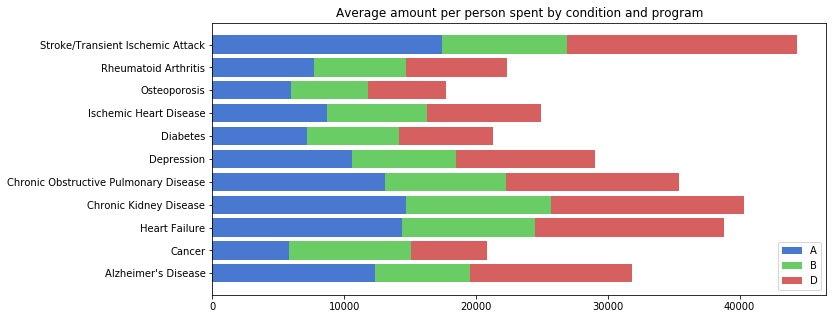

In [8]:
_ = plt.figure(figsize=(11,5))

left_A = None
left_B = avg_paid_part_A
left_D = [sum(x) for x in zip(avg_paid_part_A, avg_paid_part_B)]


p1 = plt.barh(idx, avg_paid_part_A)
p2 = plt.barh(idx, avg_paid_part_B, left=left_B)
p4 = plt.barh(idx, avg_paid_part_A, left=left_D)

plt.title('Average amount per person spent by condition and program')
plt.yticks(idx, con_labels)
plt.legend((p1[0], p2[0], p4[0]), ('A', 'B', 'D'))
plt.show();